In [1]:
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()


Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


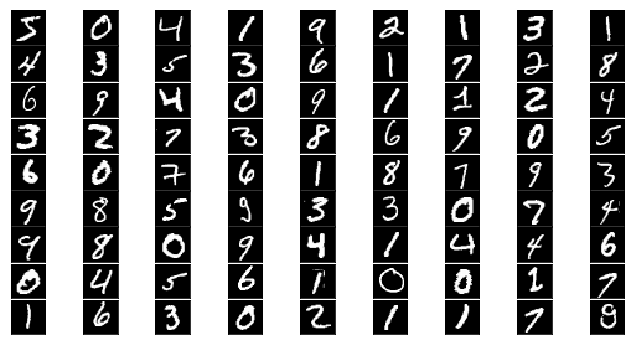

In [3]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9,9,i+1,xticks=[],yticks=[])
    ax.imshow(x_train[i].reshape((28,28)),cmap='gray')
    

In [4]:
from keras.utils import np_utils
nb_classes = 10


In [5]:
# 画像を1次元配列化
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 画素を0.0-1.0の範囲に変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


(60000, 'train samples')
(10000, 'test samples')


In [6]:
# one-hot-encoding
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [8]:
model = Sequential()

model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [10]:
batch_size = 128
epochs = 20
history = model.fit(x_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=2,
                            validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
2s - loss: 0.2338 - acc: 0.9306 - val_loss: 0.1069 - val_acc: 0.9682
Epoch 2/20
1s - loss: 0.0826 - acc: 0.9738 - val_loss: 0.0910 - val_acc: 0.9730
Epoch 3/20
1s - loss: 0.0550 - acc: 0.9824 - val_loss: 0.0838 - val_acc: 0.9745
Epoch 4/20
1s - loss: 0.0375 - acc: 0.9880 - val_loss: 0.0839 - val_acc: 0.9745
Epoch 5/20
1s - loss: 0.0262 - acc: 0.9912 - val_loss: 0.0843 - val_acc: 0.9780
Epoch 6/20
1s - loss: 0.0224 - acc: 0.9925 - val_loss: 0.0784 - val_acc: 0.9805
Epoch 7/20
1s - loss: 0.0204 - acc: 0.9928 - val_loss: 0.0641 - val_acc: 0.9810
Epoch 8/20
1s - loss: 0.0172 - acc: 0.9944 - val_loss: 0.0731 - val_acc: 0.9805
Epoch 9/20
1s - loss: 0.0152 - acc: 0.9948 - val_loss: 0.0766 - val_acc: 0.9825
Epoch 10/20
1s - loss: 0.0119 - acc: 0.9958 - val_loss: 0.0949 - val_acc: 0.9778
Epoch 11/20
1s - loss: 0.0146 - acc: 0.9953 - val_loss: 0.0862 - val_acc: 0.9797
Epoch 12/20
1s - loss: 0.0103 - acc: 0.9965 - val_loss: 0.0783 - val_

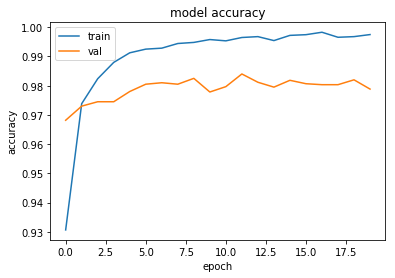

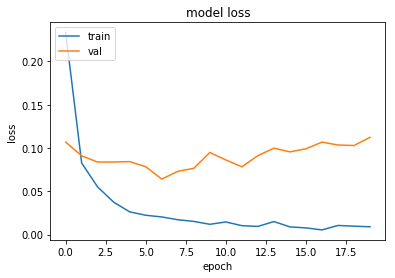

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
_, acc = model.evaluate(x_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))

accuracy: 0.9788


In [13]:
from sklearn.metrics import classification_report, confusion_matrix

labels_pred = model.predict_classes(x_test, verbose=0)

print(confusion_matrix(y_test, labels_pred))
print(classification_report(y_test, labels_pred))

[[ 966    0    1    1    1    1    6    2    2    0]
 [   0 1127    0    1    1    0    2    0    3    1]
 [   0    0  999    4    5    0    3    7   14    0]
 [   0    0    0  998    0    3    0    4    3    2]
 [   0    0    1    1  965    0    3    3    1    8]
 [   0    0    0   22    0  849    9    2    8    2]
 [   3    2    0    0    8    1  941    0    3    0]
 [   0    7    4    1    1    0    0 1008    3    4]
 [   0    1    1    6    1    1    1    3  957    3]
 [   3    3    0    4    9    2    0    8    2  978]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.99      0.97      0.98      1032
          3       0.96      0.99      0.97      1010
          4       0.97      0.98      0.98       982
          5       0.99      0.95      0.97       892
          6       0.98      0.98      0.98       958
          7       0.97      0.98      0.98  